-------------------
Data Pre Processing
-------------------

Loading Libraries

In [29]:
#importing libraries
import pandas as pd
import os
import librosa
import numpy as np
from tqdm import tqdm
import ast
import json
import matplotlib.pyplot as plt
import seaborn as sns

Feature Extraction Functions

In [15]:
#extracting mfcc

def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

Reading Meta Data File

In [2]:
audio_dataset_path='G:/DeepShip Dataset/'
metadata=pd.read_csv('../metadata-detailed.csv')
metadata.head()

,Recording ID,File_name,Folder_ID,Class_ID,Class,File_path,Ship Name,Date of Recording,Time of Recording,Durations (s),Distance (m)
0,1,1.wav,1,1,Cargo,Cargo\1\1.wav,SEASPAN SWIFT,20171104,203623,458,1583-1981
1,2,2.wav,2,1,Cargo,Cargo\2\2.wav,ISTRA ACE,20171104,223241,441,1535-1779
2,3,3.wav,3,1,Cargo,Cargo\3\3.wav,SAMOS WARRIOR,20171105,84406,297,642-1520
3,4,4.wav,4,1,Cargo,Cargo\4\4.wav,NYK REMUS,20171106,115234,331,1579-1906
4,5,5.wav,5,1,Cargo,Cargo\5\5.wav,SEASPAN RELIANT,20171107,452,208,477-1241


Iterating through the audio files using metadata file in order to extract features from each audio file.

In [20]:
# Initialize a list to store extracted features and labels
extracted_features = []

# Iterate through metadata and extract features
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), row['Class'], str(row['Folder_ID']), row['File_name']) #getting the filename to send for feature extraction

    final_class_label = row['Class'] #getting the class label of audio file
    data = features_extractor(file_name) #sending file for mfcc extraction
    extracted_features.append([data, final_class_label]) #appending the received features and class label to datagrame

In [21]:
extracted_features

[[array([-3.51625122e+02,  8.68726273e+01, -1.49802084e+01,  2.12550373e+01,
         -7.73253870e+00,  1.45975780e+01, -4.06543827e+00,  1.45205088e+01,
         -7.56530857e+00,  7.25171375e+00, -1.26351185e+01,  1.13892441e+01,
         -7.16151810e+00,  8.56386757e+00, -7.48543549e+00,  7.83648443e+00,
         -8.05403614e+00,  7.75935173e+00, -2.12605739e+00,  9.10551548e+00,
         -5.11901188e+00,  9.68615341e+00, -6.11997485e-01,  8.58005810e+00,
         -3.74677151e-01,  6.18445063e+00, -1.55947936e+00,  4.86904812e+00,
         -8.25706005e-01,  3.44320488e+00, -2.29002357e+00,  3.84449553e+00,
          8.54418635e-01,  3.36997962e+00, -6.71508491e-01,  2.61769676e+00,
          1.00520644e-02,  2.96698213e+00,  2.92616010e+00,  7.46389961e+00],
        dtype=float32),
  'Cargo'],
 [array([-4.3363748e+02,  1.0278814e+02,  4.2636442e+00,  3.1529789e+01,
         -8.7992704e-01,  1.6512604e+01,  2.8421412e+00,  1.9528469e+01,
         -4.4790411e+00,  1.0194255e+01, -3.970

In [27]:
extracted_features_df_for_csv = pd.DataFrame(extracted_features, columns=["Features", "Class"])

extracted_features_df_for_csv

,Features,Class
0,"[-351.62512, 86.87263, -14.980208, 21.255037, ...",Cargo
1,"[-433.63748, 102.78814, 4.263644, 31.529789, -...",Cargo
2,"[-459.4379, 118.98667, 14.566436, 32.147232, 1...",Cargo


Saving extracted features to csv

In [71]:
#extracted_features_df_for_csv['Features'] = extracted_features_df_for_csv['Features'].apply(lambda x: x.tolist()) #to same the extracted features in exact format
extracted_features_df_for_csv['Features'] = extracted_features_df_for_csv['Features'].apply(lambda x: ','.join(map(str, x)))

extracted_features_df_for_csv.to_csv('data_sample_extracted.csv', index=False)

Generating a sample heatmap of mfcc coefficients

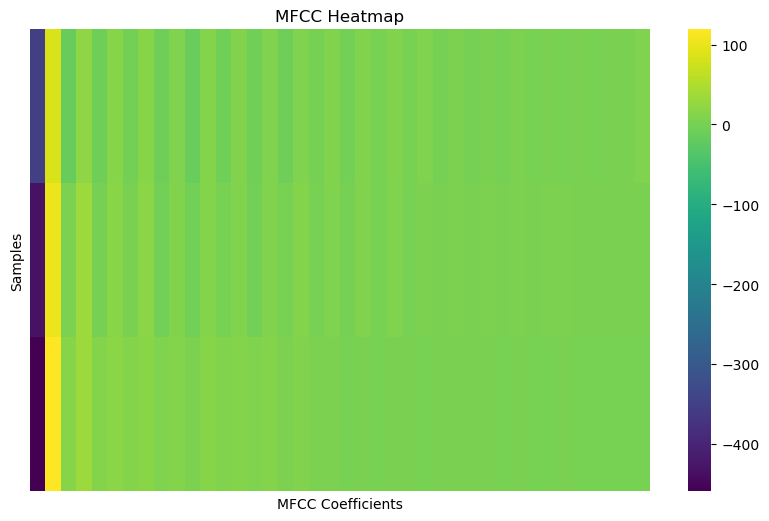

In [31]:
mfcc_array = np.array(extracted_features_df_for_csv['Features'].tolist())

plt.figure(figsize=(10, 6))
sns.heatmap(mfcc_array, cmap='viridis', annot=False, xticklabels=False, yticklabels=False)
plt.title('MFCC Heatmap')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Samples')
plt.show()

---------------
Model Pre Work
---------------

Loading Libraies

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Loading Dataset

In [97]:
ex_data = pd.read_csv(r'./data_sample_extracted.csv')
ex_data['Features'] = ex_data['Features'].apply(lambda x: list(map(float, x.split(','))))

In [98]:
ex_data

,Features,Class
0,"[-351.6251220703125, 86.87262725830078, -14.98...",Cargo
1,"[-433.6374816894531, 102.78813934326172, 4.263...",Cargo
2,"[-459.4378967285156, 118.9866714477539, 14.566...",Cargo
3,"[-351.6251220703125, 86.87262725830078, -14.98...",Cargo
4,"[-433.6374816894531, 102.78813934326172, 4.263...",Cargo
...,...,...
210,"[-427.6917724609375, 92.53729248046875, 0.2251...",Tanker
211,"[-380.00146484375, 102.57173919677734, 11.8344...",Tanker
212,"[-547.1192626953125, 104.72801971435547, 15.45...",Tanker
213,"[-338.3280029296875, 77.36510467529297, -3.578...",Tanker


Splitting Features

In [99]:
X=np.array(ex_data['Features'].tolist())
y=np.array(ex_data['Class'].tolist())

In [100]:
print('mfcc Features       : ',X.shape)
print('Class Labels shape  : ',y.shape)

mfcc Features       :  (215, 40)
Class Labels shape  :  (215,)


In [101]:
X_copy_1 = X
y_copy_1 = y

X_copy_2 = X
y_copy_2 = y

In [102]:
#label encoding the class labels of y_copy_1

label_encoder = LabelEncoder()
y_copy_1 = label_encoder.fit_transform(y)

In [103]:
y_copy_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X_copy_1,y_copy_1,test_size=0.2,random_state=0)

In [110]:
X_test

array([[-3.40018585e+02,  9.06883011e+01, -1.14347811e+01, ...,
         1.18066454e+00,  3.48915100e+00,  5.70739031e+00],
       [-4.17812714e+02,  8.41038666e+01, -6.43273878e+00, ...,
         1.78464249e-01,  4.62213945e+00,  5.74030757e-01],
       [-2.84010040e+02,  1.12422707e+02, -2.89654946e+00, ...,
         8.63035083e-01,  7.72964358e-01,  3.05006099e+00],
       ...,
       [-4.64686218e+02,  1.26462868e+02,  5.74954510e+00, ...,
         1.11692202e+00,  3.09584355e+00,  2.69285989e+00],
       [-3.37730469e+02,  9.18278198e+01, -3.10437751e+00, ...,
         1.23607981e+00,  2.73603892e+00,  2.04979229e+00],
       [-4.84450348e+02,  1.15464897e+02,  8.98717785e+00, ...,
         7.38104522e-01,  1.84670234e+00,  1.37329340e+00]])

-----------------------
Machine Learning Models
-----------------------

---------
SVM

Loading Libraries

In [119]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import classification_report

Defining Parameters for SVM

In [106]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf'))
])

param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.1, 1, 10] 
}

In [107]:
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=4, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

Fitting 4 folds for each of 9 candidates, totalling 36 fits


Testing Accuracy for SVM

In [111]:
test_accuracy = best_svm_model.score(X_test, y_test)

print("Best Parameters  ::", best_params)
print("Test Accuracy    ::", test_accuracy)

Best Parameters  :: {'svm__C': 10, 'svm__gamma': 0.1}
Test Accuracy    :: 0.813953488372093


Confusion Matrix

Text(70.72222222222221, 0.5, 'Truth')

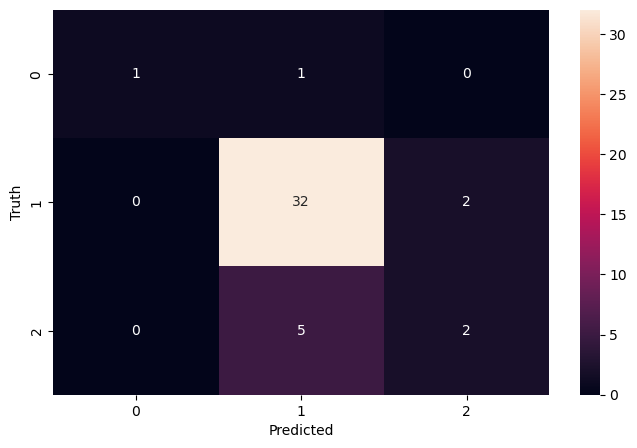

In [118]:
cm = confusion_matrix(y_test, grid_search.predict(X_test))
plt.figure(figsize = (8,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Precision & Recall

In [120]:
print(classification_report(y_test, grid_search.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.84      0.94      0.89        34
           2       0.50      0.29      0.36         7

    accuracy                           0.81        43
   macro avg       0.78      0.58      0.64        43
weighted avg       0.79      0.81      0.79        43



---------
Decision Tree

-----------------------
Deep Learning Models
-----------------------

--------------
Basic ANN Model

Importing Libraries

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

In [94]:
## No of classes
num_labels=y_copy_1.shape[0]
num_labels

11

Creating Model --- Needs to understand this one

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
num_epochs = 1500
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Testing Model Performance

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

---------------
Unseen Data Testing
---------------